# 3 Oct 23 - Activity: PDEs and Separation of Variables

As we have realized, solving field problems using vector equations is not always the best way to go about solving our problems. The integrals can be difficult to set up and the equations might be difficult, if not, impossible to solve (e.g., because there is no anti-derivative for the integrand). While we might not fully eliminate the need for vector equations, in electrostatic situations, we can posit the [electric potential](https://en.wikipedia.org/wiki/Electric_potential), $\Phi$. 

**We changed to using $\Phi$ because there are also things like $dV$ -- volume elements.** 

The scalar field, $\Phi(\mathbf{r})$ is given by Poisson's equation as it is related to the electric field by the gradient.

$$\nabla \cdot \vec{E} = \frac{\rho}{\epsilon_0} \rightarrow \vec{E} = -\nabla \Phi$$

$$\nabla \cdot (-\nabla \Phi) = -\nabla^2 \Phi = \frac{\rho}{\epsilon_0}$$

$$\nabla^2 \Phi = -\frac{\rho}{\epsilon_0}$$

As you might have seen, there is an integral form of the electric potential. This is built up from the description that we have seen for the electric field of a point charge.

$$\vec{E}_{pt} = \frac{1}{4\pi\epsilon_0}\frac{q}{r^2}\hat{r} \rightarrow \Phi_{pt} = \frac{1}{4\pi\epsilon_0}\frac{q}{r}$$

Or more generally, for a continuous charge distribution,

$$d\Phi = \frac{1}{4\pi\epsilon_0}\frac{\rho dV}{|\mathbf{r}-\mathbf{r}'|}$$
$$\Phi = \frac{1}{4\pi\epsilon_0}\iiint\frac{\rho dV}{|\mathbf{r}-\mathbf{r}'|}$$

Much like we have done with the electric field, one can set up a forward integral formulation of the electric potential and add up the elements to find the total potential. Let's use Python [sympy] library to illustrate this. We start with the point charge. Here $k=\frac{1}{4\pi\epsilon_0}$. 

First, we show how to form an expression for the point charge potential.

## Point Charge Potential

In [5]:
from sympy import symbols, latex, init_printing, Rational
from sympy.interactive import printing

# Setup LaTeX printing
init_printing(use_latex=True)

# Define variables
k, q, r = symbols('k q r')

# Define electric potential equation for point charge
V = k * q / r

# Print the equation in LaTeX format
display(V)

### Potential of a charged rod

It is common to compute the electric potential of a charged rod along a line perpendicular to it along the y-axis. Let's do this for a rod of length $L$ with a uniform charge density, $\lambda$. We will assume that the rod is centered on the origin and that the axis of the rod is aligned with the $x$-axis. We can treat a tiny piece of the rod like a point charge and add things up!

Let's find the electric potential at $\langle 0,y,0 \rangle$.

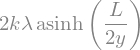

In [6]:
from sympy import integrate, sqrt

# Define more variables
L, lambda_, y, x = symbols('L lambda y x')

# Define limits of integration for a rod of length L centered at the origin
lower_limit = -L / 2
upper_limit = L / 2

# Define the integrand for electric potential due to a uniformly charged rod
integrand = (lambda_ * k) / sqrt(x**2 + y**2)

# Perform the integration
V_rod = integrate(integrand, (x, lower_limit, upper_limit))

# Print the result in LaTeX format
display(V_rod)

What's nice is that we can change the problem quickly byt changing the location or the distribution. For example, to find the field on the end of the rod, we have to change the integrand a bit. Let's assume we are looking at the end of the rod at $\langle x_0,0,0 \rangle$.

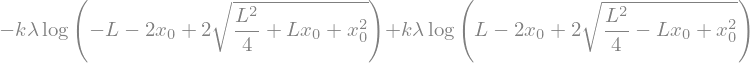

In [7]:
# Define more variables
x0 = symbols('x0')

# Define the integrand for electric potential due to a uniformly charged rod
integrand = (lambda_ * k) / sqrt((x-x0)**2)

# Perform the integration
V_rod_2 = integrate(integrand, (x, lower_limit, upper_limit))

# Print the result in LaTeX format
display(V_rod_2)

However, this approach is typically not the best way to solve electric potential problems because they often only work for specific geometries and at certain locations. For example, consider the general location $\langle x_0,y_0,0 \rangle$. We can still use the integral approach, but we find that our solution is becoming more complicated and harder to interpret easily. It is also the case that we can (quite easily) form integrals that are not possible to compute analytically.

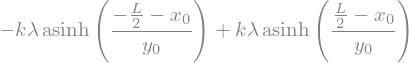

In [8]:
# Define more variables
y0 = symbols('y0')

# Define the integrand for electric potential due to a uniformly charged rod
integrand = (lambda_ * k) / sqrt((x-x0)**2+(y0)**2)

# Perform the integration
V_rod_3 = integrate(integrand, (x, lower_limit, upper_limit))

# Print the result in LaTeX format
display(V_rod_3)


Instead, we will use the differential form of the electric potential where there are no charges, but the boundaries are set to a given potential. This is called **Laplace's equation**. 

*Note that regardless of the approach to find the electric field we will need to eventually compute the gradient of the electric potential.* We will need to do that numerically later.



## Laplace's Equation

*Numerical solution to Laplace's equation on an annulus*
![Laplace's Equation](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Laplace%27s_equation_on_an_annulus.svg/800px-Laplace%27s_equation_on_an_annulus.svg.png)


While Poisson's equation describes how the value of the local Laplacian of the electric potential is directly related to the local electric potential, there are many places where there are no charges. For example, it's common to solve problems where the **boundary conditions** are set to a given potential or with a certain amount of charge, and the remaining space is empty (or free space). This doesn't mean that an electric field is not present in that empty space, but rather that there are no charges. In this case, the problem that are solving is called **Laplace's equation** - a special case of Poisson's equation where $\rho = 0$.

$$\nabla^2 \Phi = 0$$

There are two important ways to go about solving these problems. The first is using separation of variables, which is a common analytical technique. The second is to use numerical methods that we will discuss later in the course. Both of these methods rely on the the following properties of the solutions to Laplace's equation.

### Properties of Solutions to Laplace's Equation

1. $\Phi$ has no local maxima or minima except at boundaries
2. $\Phi$ is smooth and continuous everywhere
3. $\Phi$ is single valued
4. $\Phi$ at a location is the average of the values of $\Phi$ over the surrounding space
5. $\Phi$ is unique. There is only one solution to Laplace's equation for a given set of boundary conditions.

## Activity: The Infinite Gutter

![Infinite Gutter](https://i.stack.imgur.com/nHF7a.jpg)

Consider a metal gutter that extends into infinitely in the $z$ direction. The gutter width in the $y$ direction is $a$. It is placed in the $y-z$ plane and the $+x$ direction is not constrained and extends to infinity (both the wall at $y=0$ and $y=a$). So that Laplace's equation applies in the region:

1. any $z$ value
2. $x > 0$
3. $0 < y < a$

### Boundary Conditions

What uniquely determines our solution to Laplace's equation are the boundary conditions. For this case, we are going to set all the conditions to zero except one to illustrate the way we find those unique solutions. The boundary conditions are:

1. $\Phi(x>0, y=0) = 0$ Grounded
2. $\Phi(x>0, y=a) = 0$ Grounded
3. $\Phi(x=0, 0 < y < a) = V_0(y)$ Set potential at the bottom of the gutter
4. $\Phi(x\rightarrow \infty,0<y<a) = 0$ Potential goes to zero at infinity

Because we have infinite extent in the $z$ direction, we don't need to solve for that direction. We can assume the potential looks the same for every slice of the $x-y$ plane in the region. This means we can simplify our approach:

$$\nabla^2 \Phi = \nabla^2 \Phi(x,y) = 0 \longrightarrow \Phi(x,y) = X(x)Y(y)$$

**&#9989; Do this** 

1. Using the proposed solution, use separation of variables to find ODEs for $X(x)$ and $Y(y)$.
2. Solve the ODEs for $X(x)$ and $Y(y)$ in general. How do you choose which general solution to use in which direction?
3. Apply the boundary conditions to solve for the constants in the general solutions. 

**Note that applying the boundary condition for $x=a$ will result in an equation of the form $V(0,y) = C'\sin(ky)$ where $C'$ and $k$ are some constants.** This is a new thing that we running up against. It requires that we use Fourier's trick to solve for the appropriate constants. This will lead us into [orthgonal functions](https://en.wikipedia.org/wiki/Orthogonal_functions) and [Fourier series](https://en.wikipedia.org/wiki/Fourier_series).

### Fourier's Trick

Fourier's trick is just what results from integrated orthonormal functions over the domain of importance. For example, the most common version of this approach is to integrate the product of two sine functions over the domain $[0,\pi]$ or the equivalent in the case of a length scale $a$.

$$\int_0^a \sin\left(\dfrac{n\pi y}{a}\right) \sin\left(\dfrac{m\pi y}{a}\right) dy = \begin{cases} 0 & n \neq m \\ \dfrac{a}{2} & n = m \end{cases}$$

We have shown that the final form of the undetermined boundary condition is:

$$\Phi(0,y) = \sum_n C_n \sin\left(\dfrac{n\pi y}{a}\right)$$

Let's multiple both sides by $\sin\left(\dfrac{m\pi y}{a}\right)$ and integrate over the domain $[0,a]$.

$$\int_0^a \Phi(0,y) \sin\left(\dfrac{m\pi y}{a}\right) dy = \sum_n C_n \int_0^a \sin\left(\dfrac{n\pi y}{a}\right) \sin\left(\dfrac{m\pi y}{a}\right) dy$$

The left hand side is only non-zero when $n=m$, so we use the [Kronecker delta](https://en.wikipedia.org/wiki/Kronecker_delta) to simplify the right hand side.

$$\int_0^a \Phi(0,y) \sin\left(\dfrac{m\pi y}{a}\right) dy = \sum_n C_n \dfrac{a}{2}\delta_{nm}$$

We further simplify by noticing that the right hand side is only non-zero when $n=m$, so that the requirement is that the indicies are equal.

$$\int_0^a \Phi(0,y) \sin\left(\dfrac{m\pi y}{a}\right) dy = C_m \dfrac{a}{2}$$

Turn the equation around to solve for $C_m$, and we have an integral expression.

$$C_m = \dfrac{2}{a}\int_0^a \Phi(0,y) \sin\left(\dfrac{m\pi y}{a}\right) dy$$

**&#9989; Do this**
1. Let $\Phi(0,y) = V_0$, which is the potential at the bottom of the gutter. Use the integral expression to find $C_m$.
2. Combined with your prior work, write down the solution for the electric potential in the gutter. What do you notice about the solution? Can you visualize it?

### Visualizing the Solution

We often find from these analyses that we produce infinite series solutions like this for the potential (note this is for a different problem):

$$\Phi(x,y) = \sum_{n=1,3,5,\dots}^{\infty} \dfrac{4V_0}{n\pi} \sin\left(\dfrac{n\pi x}{a}\right) e^{-\frac{n\pi y}{a}}$$


This solution is for the domain $0< x< a$ and infinite $y$ extent. It's a 90 degree-turned version of the problem you solved earlier.

**&#9989; Do this**

Create a 3D figure of the electric potential of this situation. 

1. You will need to create a mesh grid of $x$ and $y$ values.
2. You will need to create a function that sums the series for a given $x$ and $y$ value.
3. You will need to truncate the series after some terms (you can't sum to infinity).
4. You will need to plot the result using `plot_surface` from `matplotlib`.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Electric Potential')

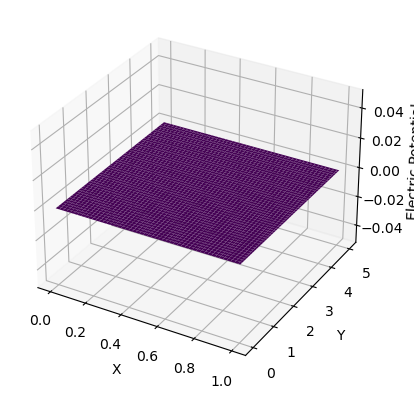

In [10]:
# Constants
a = 1.0 # Gap width
V0 = 1.0  # Potential difference
steps = 100

# Set size of space
x_range = np.linspace(0, a, steps) 
y_range = np.linspace(0, 5*a, 5*steps) 

# Create a mesh
X, Y = np.meshgrid(x_range, y_range)

# Function to calculate the electric potential at a given (x, y)
def electric_potential(x, y, terms=50):
    
    phi = 0.0
    ## Compute Phi at (x, y) due to each term in the series
    ## Write the summation up to the 'terms' number of terms
    
    
    return phi

# Calculate the electric potential on the mesh grid
Z = np.zeros_like(X)

## Write the routine to calculate the electric potential on the mesh
## You will need to step through each point in the mesh and call the
## electric_potential() function to calculate the electric potential

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the electric potential surface
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Electric Potential')